<a href="https://colab.research.google.com/github/Noob919/Feature_selection/blob/main/house_votes_84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection  import chi2, SelectKBest,mutual_info_classif,SelectPercentile,f_classif
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df  = pd.read_csv("/content/house-votes-84.csv")

In [61]:
len(df.columns)

17

In [33]:
for i in range((len(df.columns))):
  if(df[df.columns[i]].dtype == 'object'):
    df[df.columns[i]] =  df[df.columns[i]].replace("?", df[df.columns[i]].value_counts().index[0])

In [34]:
df.head(2)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y


In [35]:
for i in range((len(df.columns))):
   df[df.columns[i]]  =  LabelEncoder().fit_transform(df[df.columns[i]])

In [36]:
df.head(1)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,1,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1


In [40]:
X = df.drop(['Class Name'],axis =1)
y = df['Class Name']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

[3.833e+01 2.303e-02 9.220e+01 2.135e+02 9.723e+01 2.592e+01 4.633e+01
 6.777e+01 8.132e+01 1.490e+00 3.836e+01 1.173e+02 5.579e+01 6.249e+01
 6.862e+01 7.678e+00]


Text(0, 0.5, 'Features name')

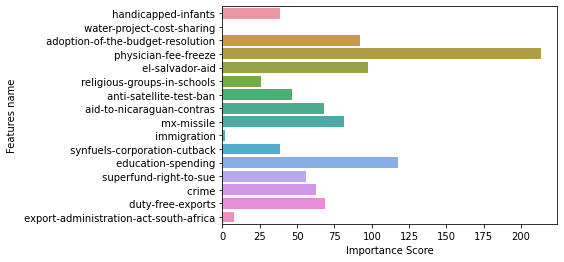

In [42]:
test = SelectKBest(score_func=chi2, k=len(X.columns)).fit(X,y)
np.set_printoptions(precision=3)
score  =  test.scores_
print(score)
Y = X.columns
sns.barplot(x  = score,y = Y )
plt.xlabel('Importance Score')
plt.ylabel('Features name')

In [43]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [44]:
rf.feature_importances_

array([0.014, 0.014, 0.17 , 0.32 , 0.105, 0.006, 0.017, 0.04 , 0.05 ,
       0.015, 0.053, 0.104, 0.024, 0.028, 0.033, 0.008])

Text(0.5, 0, 'Feature Importance')

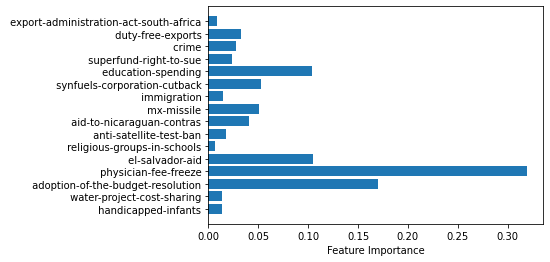

In [45]:
sort = rf.feature_importances_
plt.barh(X.columns, rf.feature_importances_)
plt.xlabel("Feature Importance")

Text(0.5, 0, 'Feature Importance MEAN')

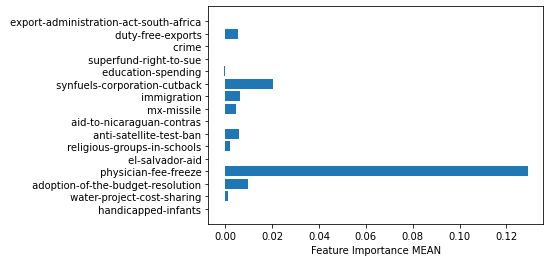

In [46]:
clf = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)
result = permutation_importance(clf, X, y, n_repeats=10, random_state=0)
plt.barh(X.columns, result.importances_mean )
plt.xlabel("Feature Importance MEAN")

Text(0.5, 0, 'Feature Importance STD')

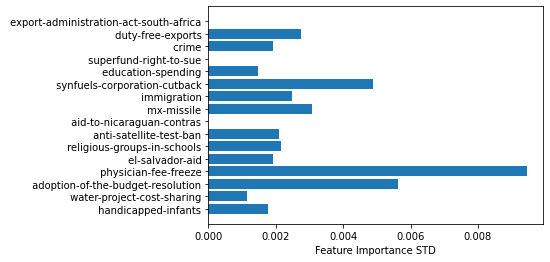

In [47]:
plt.barh(X.columns, result.importances_std)
plt.xlabel("Feature Importance STD")

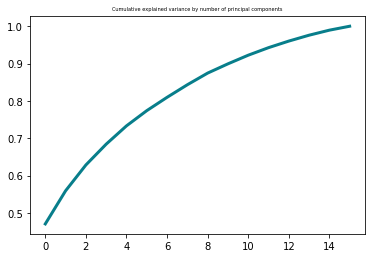

In [48]:
pca = PCA().fit(X_train)
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=5)
plt.show()

In [49]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X.columns) + 1)],
    index=X.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
handicapped-infants,-0.261876,0.080583,-0.127124,0.170386,0.332351,0.042338,-0.027334,0.087424,0.028349,0.018061,-0.054779,0.016092,0.020692,-0.007191,-0.005438,-0.015250
water-project-cost-sharing,0.071541,0.373273,0.067964,0.238255,-0.141384,0.099804,0.073690,0.009983,-0.064140,-0.025282,-0.032352,0.021341,-0.011215,0.020486,0.016551,0.002525
adoption-of-the-budget-resolution,-0.390717,0.066936,0.093063,0.046811,0.010732,-0.088235,-0.125943,-0.039067,0.035628,0.044677,0.061579,0.029255,-0.179540,0.050148,0.008659,-0.047059
physician-fee-freeze,0.422769,-0.072112,-0.075867,0.021689,-0.010864,0.060910,0.077938,0.061983,-0.036790,0.005297,0.042337,0.013480,-0.052898,0.011826,-0.156293,-0.088039
el-salvador-aid,0.438557,0.037245,-0.003779,0.010334,0.079383,0.013357,-0.099689,0.019149,-0.073580,-0.010101,0.066740,-0.014759,-0.041202,0.066702,-0.054397,0.142295


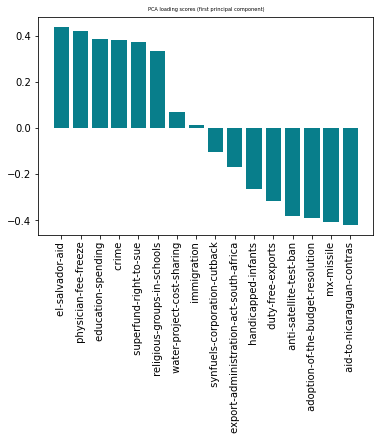

In [50]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=5)
plt.xticks(rotation='vertical')
plt.show()

In [51]:
fs_fit_fscore = SelectKBest(f_classif, k=len(X.columns))
fs_fit_fscore.fit_transform(X_train, y_train)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:len(X.columns)]
fs_indices_fscore

array([ 3,  2, 11,  4,  7,  8, 13, 12, 14,  6,  5,  0, 10, 15,  9,  1])

In [53]:
best_features_fscore = df.columns[fs_indices_fscore].values
print(best_features_fscore)
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
print(feature_importances_fscore)

[' adoption-of-the-budget-resolution' ' water-project-cost-sharing'
 ' synfuels-corporation-cutback' ' physician-fee-freeze'
 ' anti-satellite-test-ban' ' aid-to-nicaraguan-contras'
 ' superfund-right-to-sue' ' education-spending' ' crime'
 ' religious-groups-in-schools' ' el-salvador-aid' 'Class Name'
 ' immigration' ' duty-free-exports' ' mx-missile' ' handicapped-infants']
[1.882e+03 5.239e+02 3.961e+02 3.454e+02 2.595e+02 2.571e+02 2.491e+02
 1.645e+02 1.450e+02 1.295e+02 8.550e+01 8.158e+01 6.167e+01 4.990e+01
 2.352e+00 2.405e-01]


Text(0, 0.5, 'Features')

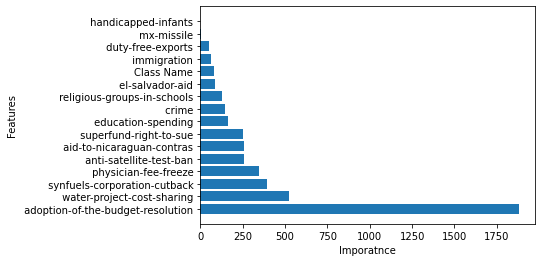

In [54]:
plt.barh(best_features_fscore, feature_importances_fscore)
plt.xlabel('Imporatnce')
plt.ylabel('Features')

In [55]:
fs_fit_mutual_info = SelectKBest(mutual_info_classif, k=len(X.columns))
fs_fit_mutual_info.fit_transform(X_train, y_train)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:len(X.columns)]
best_features_mutual_info = df.columns[fs_indices_mutual_info].values
best_features_mutual_info

array([' adoption-of-the-budget-resolution', ' physician-fee-freeze',
       ' water-project-cost-sharing', ' synfuels-corporation-cutback',
       ' superfund-right-to-sue', ' aid-to-nicaraguan-contras',
       ' anti-satellite-test-ban', ' education-spending',
       ' el-salvador-aid', ' crime', ' religious-groups-in-schools',
       ' immigration', 'Class Name', ' mx-missile', ' duty-free-exports',
       ' handicapped-infants'], dtype=object)

In [56]:
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
feature_importances_mutual_info

array([0.485, 0.309, 0.302, 0.277, 0.244, 0.189, 0.17 , 0.143, 0.126,
       0.125, 0.115, 0.064, 0.056, 0.03 , 0.014, 0.004])

Text(0, 0.5, 'Features')

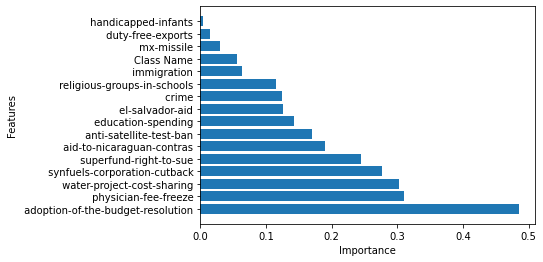

In [57]:
plt.barh(best_features_mutual_info,feature_importances_mutual_info)
plt.xlabel('Importance')
plt.ylabel('Features')

In [58]:
df_corr = df.corr()
df_corr

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
Class Name,1.000000,-0.393140,0.010952,-0.734270,0.909627,0.683690,0.412987,-0.504521,-0.617036,-0.628299,0.083843,-0.366862,0.666603,0.526821,0.606301,-0.512738,-0.351903
handicapped-infants,-0.393140,1.000000,0.005031,0.375624,-0.397852,-0.340085,-0.386236,0.341133,0.363787,0.330680,-0.091641,0.112518,-0.394638,-0.340828,-0.370393,0.219905,0.207915
water-project-cost-sharing,0.010952,0.005031,1.000000,-0.042424,0.048290,0.131543,0.154490,-0.181424,-0.071236,-0.166197,-0.125711,0.118897,-0.033403,0.225490,-0.009815,-0.096392,-0.031326
adoption-of-the-budget-resolution,-0.734270,0.375624,-0.042424,1.000000,-0.732156,-0.619645,-0.402272,0.557720,0.670319,0.612900,0.025066,0.207600,-0.633838,-0.481583,-0.567444,0.455379,0.439262
physician-fee-freeze,0.909627,-0.397852,0.048290,-0.732156,1.000000,0.717914,0.440173,-0.568655,-0.671663,-0.657734,0.039902,-0.285850,0.684253,0.561161,0.634633,-0.513902,-0.398526
el-salvador-aid,0.683690,-0.340085,0.131543,-0.619645,0.717914,1.000000,0.620830,-0.662616,-0.777920,-0.760420,0.015007,-0.147905,0.591379,0.617444,0.676383,-0.542972,-0.363937
religious-groups-in-schools,0.412987,-0.386236,0.154490,-0.402272,0.440173,0.620830,1.000000,-0.504300,-0.511857,-0.550247,0.086061,0.014341,0.471371,0.539304,0.569157,-0.425170,-0.243625
anti-satellite-test-ban,-0.504521,0.341133,-0.181424,0.557720,-0.568655,-0.662616,-0.504300,1.000000,0.706362,0.651582,0.040101,0.036851,-0.519556,-0.543047,-0.488305,0.445189,0.440700
aid-to-nicaraguan-contras,-0.617036,0.363787,-0.071236,0.670319,-0.671663,-0.777920,-0.511857,0.706362,1.000000,0.727637,0.030406,0.121770,-0.593742,-0.546248,-0.580329,0.488639,0.449767
mx-missile,-0.628299,0.330680,-0.166197,0.612900,-0.657734,-0.760420,-0.550247,0.651582,0.727637,1.000000,0.042414,0.058453,-0.565769,-0.509639,-0.542627,0.464269,0.377178


In [60]:
print(abs(df_corr['Class Name']))

Class Name                                 1.000000
 handicapped-infants                       0.393140
 water-project-cost-sharing                0.010952
 adoption-of-the-budget-resolution         0.734270
 physician-fee-freeze                      0.909627
 el-salvador-aid                           0.683690
 religious-groups-in-schools               0.412987
 anti-satellite-test-ban                   0.504521
 aid-to-nicaraguan-contras                 0.617036
 mx-missile                                0.628299
 immigration                               0.083843
 synfuels-corporation-cutback              0.366862
 education-spending                        0.666603
 superfund-right-to-sue                    0.526821
 crime                                     0.606301
 duty-free-exports                         0.512738
 export-administration-act-south-africa    0.351903
Name: Class Name, dtype: float64
